In [1]:
import math
import random
from collections.abc import Iterable, MutableMapping
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import sortedcontainers
from pandas.io.formats.style import Styler

import pysorteddict

sorted_dict_lens = [100, 1_000, 10_000, 100_000, 1_000_000, 10_000_000]
sorted_dict_types = [pysorteddict.SortedDict]


def setup(sorted_dict_type: type, sorted_dict_len: int, seed: float = math.pi) -> MutableMapping:
    random.seed(seed)
    d = sorted_dict_type()
    for _ in range(sorted_dict_len):
        d[random.random()] = random.random()
    return d


def plot(stylers: Iterable[Styler], *, alpha: float = 0.7, logy: bool = False, name: str = "", yunit: str = "s"):
    for theme in ["light", "dark"]:
        with plt.style.context(f"{theme}.mplstyle", after_reset=True):
            fig, ax = plt.subplots()
            for styler, marker, loc in zip(stylers, ["D", "s"], ["upper left", "upper center"], strict=False):
                ax_lines_len = len(ax.lines)
                ax.set_prop_cycle(None)
                styler.data.plot(
                    alpha=alpha,
                    ax=ax,
                    logx=True,
                    logy=logy,
                    marker=marker,
                    xlabel="Sorted Dictionary Length",
                    xlim=(sorted_dict_lens[0] // 10, sorted_dict_lens[-1] * 10),
                    ylabel="Average Execution Time",
                )
                # Create a separate legend for these lines.
                font_prop = {"family": "JetBrains Mono"}
                ax.add_artist(
                    ax.legend(
                        handles=ax.lines[ax_lines_len:], loc=loc, prop=font_prop, title=styler.caption, title_fontproperties=font_prop,
                    ),
                )
            # Legends have been added manually. Remove the automatically added one.
            ax.get_legend().remove()
            ax.grid(which="major", linewidth=0.5, linestyle=":")
            ax.grid(which="minor", axis="y", linewidth=0.0625, linestyle="-")
            ax.minorticks_on()
            # The warning about setting labels without setting ticks can be ignored because the plot isn't interactive.
            ax.set_yticklabels(f"{label.get_text()} {yunit}" for label in ax.get_yticklabels())
            plt.show()
            fig.savefig(Path().resolve().parents[1] / "docs" / "_static" / "images" / f"perf-{name}-{theme}.svg")

# `contains`

In [2]:
def bench_contains() -> Iterable[Styler]:
    for sorted_dict_type in sorted_dict_types:
        df = pd.DataFrame(index=sorted_dict_lens, columns=["0.00 in d", "0.33 in d", "0.67 in d", "1.00 in d"])
        for i, sorted_dict_len in enumerate(sorted_dict_lens):
            d = setup(sorted_dict_type, sorted_dict_len)
            for j, key in enumerate([0.00, 0.33, 0.67, 1.00]):
                %timeit -v bench key in d
                df.iat[i, j] = bench.average * 1e9
        yield df.style.set_caption(sorted_dict_type.__module__)


stylers = [*bench_contains()]

34.8 ns ± 0.0349 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


43.1 ns ± 0.232 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


38 ns ± 0.0706 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


29.4 ns ± 0.458 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


45.7 ns ± 0.182 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


57.7 ns ± 0.131 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


54.1 ns ± 0.0958 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


56.3 ns ± 0.578 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


59.9 ns ± 0.213 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


64.9 ns ± 0.0366 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


65.3 ns ± 0.071 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


61.1 ns ± 1.28 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


77.6 ns ± 0.188 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


80.6 ns ± 0.0899 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


74.4 ns ± 0.141 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


86.8 ns ± 0.253 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


88 ns ± 0.142 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


96.7 ns ± 0.056 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


95 ns ± 0.061 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


88.9 ns ± 1.74 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


98.9 ns ± 0.253 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


110 ns ± 0.0905 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


111 ns ± 0.0916 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


108 ns ± 0.604 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


,0.00 in d,0.33 in d,0.67 in d,1.00 in d
100,34.789733,43.102180,38.027679,29.435799
1000,45.737958,57.694376,54.084936,56.279710
10000,59.882702,64.883361,65.266047,61.077734
100000,77.606664,80.619142,74.447487,86.832505
1000000,88.038660,96.681851,94.973216,88.890073
10000000,98.873451,109.809556,110.784032,107.949942


/tmp/ipykernel_2105/3893703347.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(f"{label.get_text()} {yunit}" for label in ax.get_yticklabels())


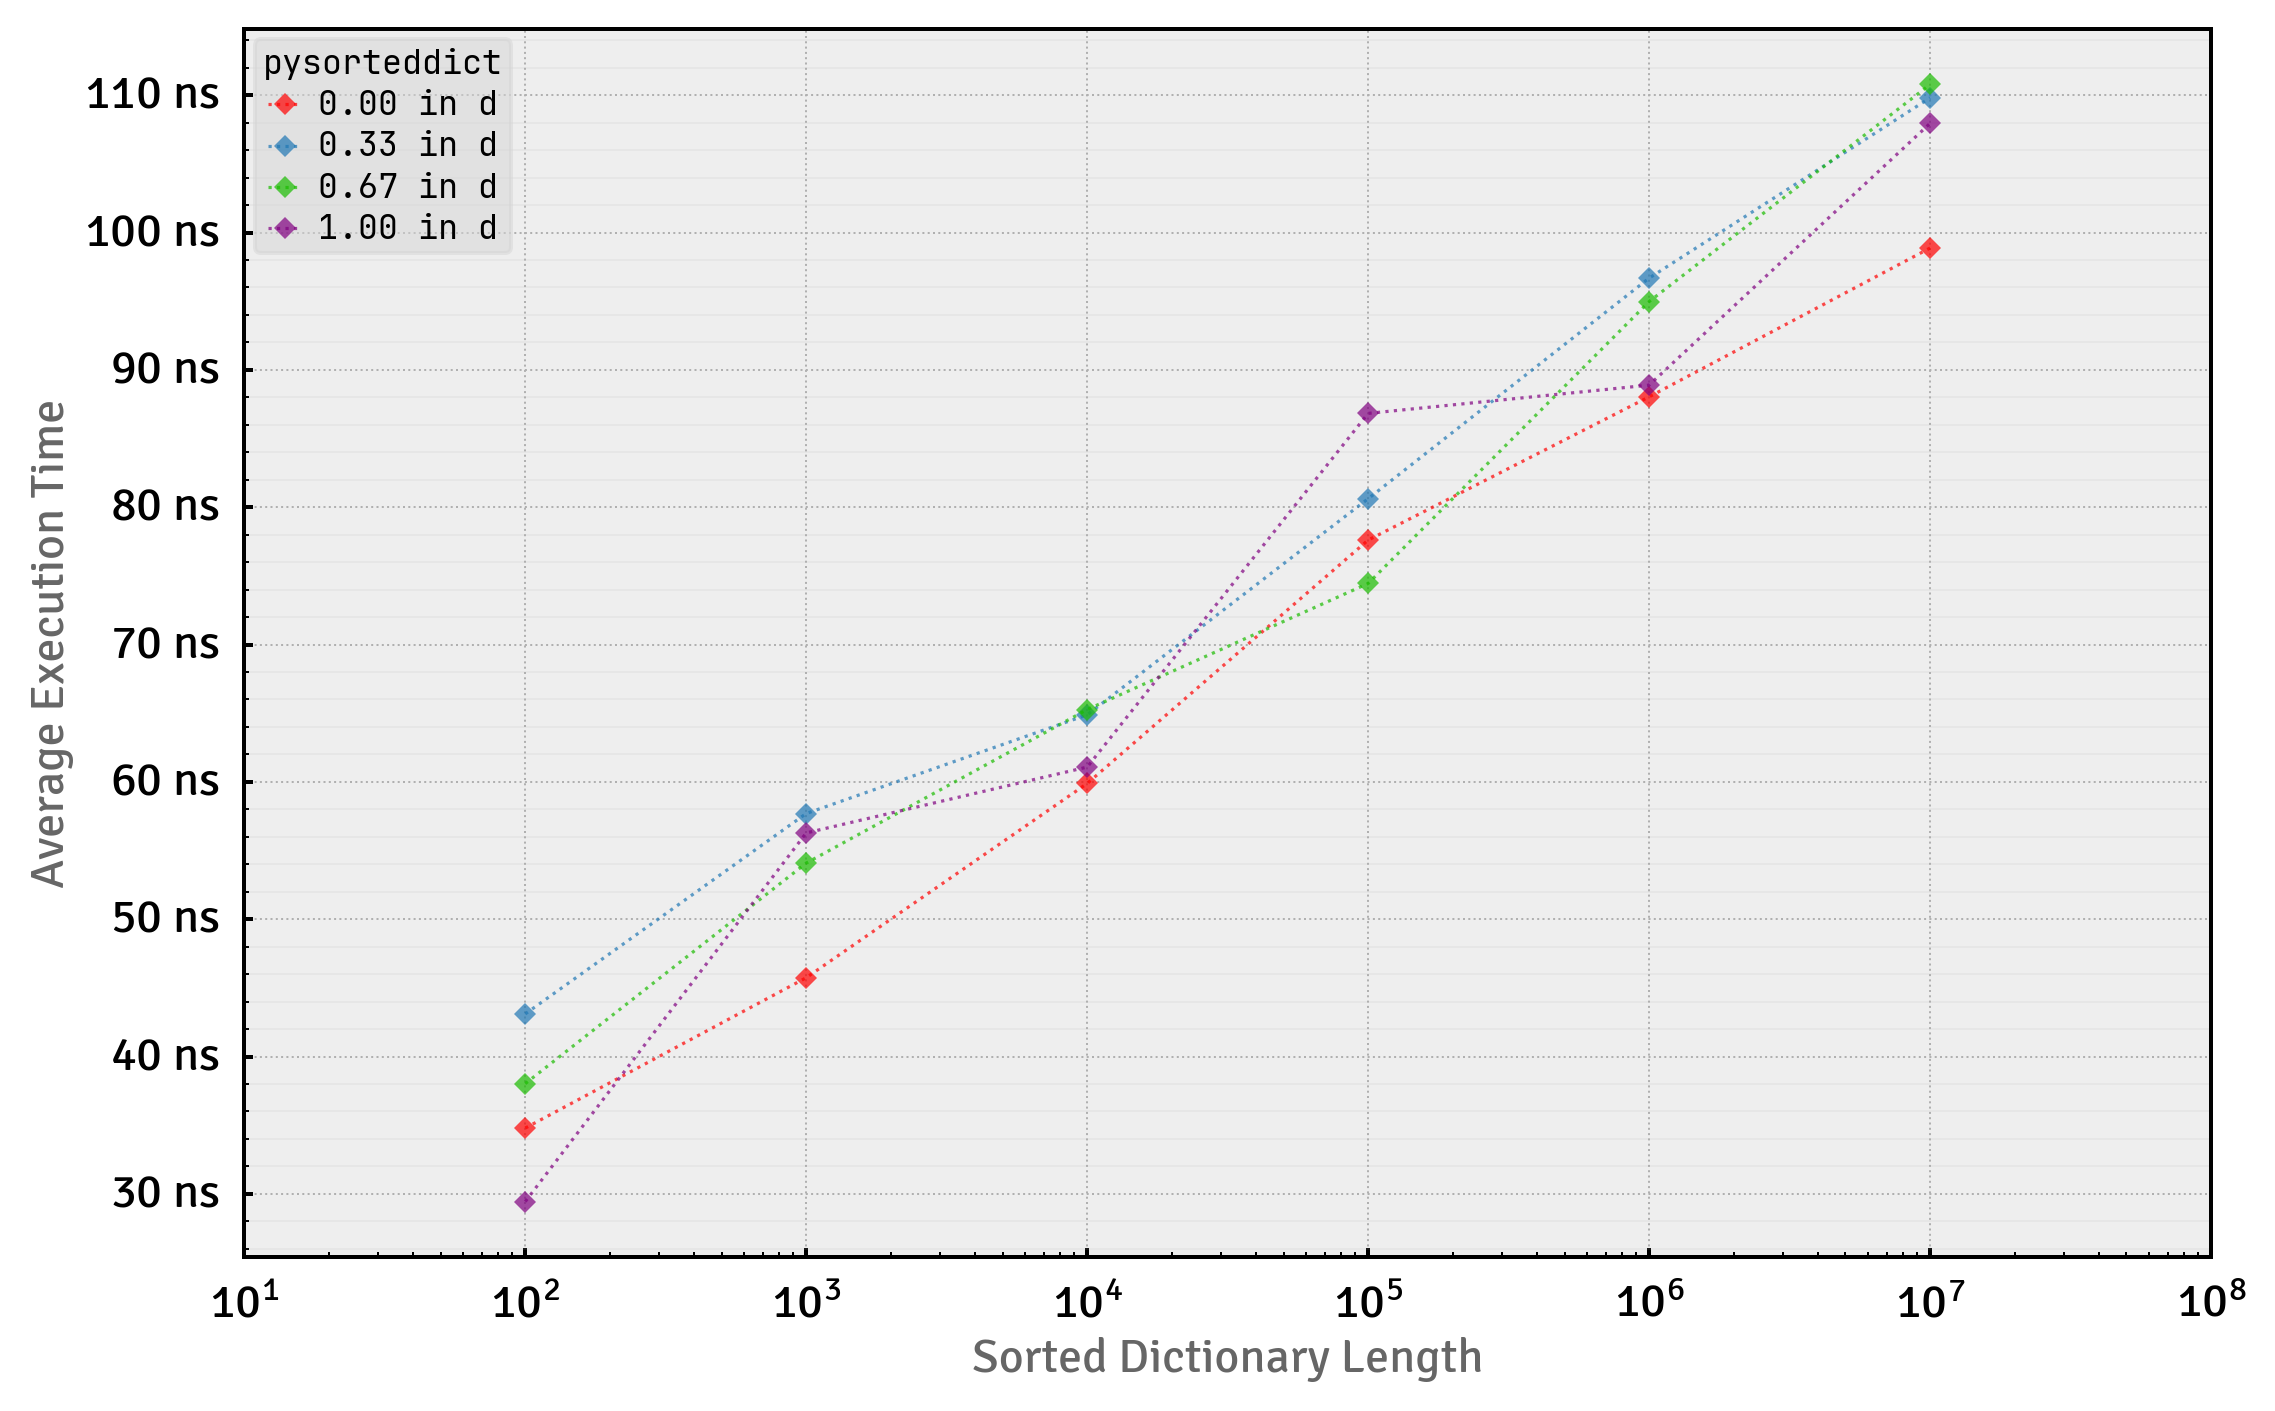

/tmp/ipykernel_2105/3893703347.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(f"{label.get_text()} {yunit}" for label in ax.get_yticklabels())


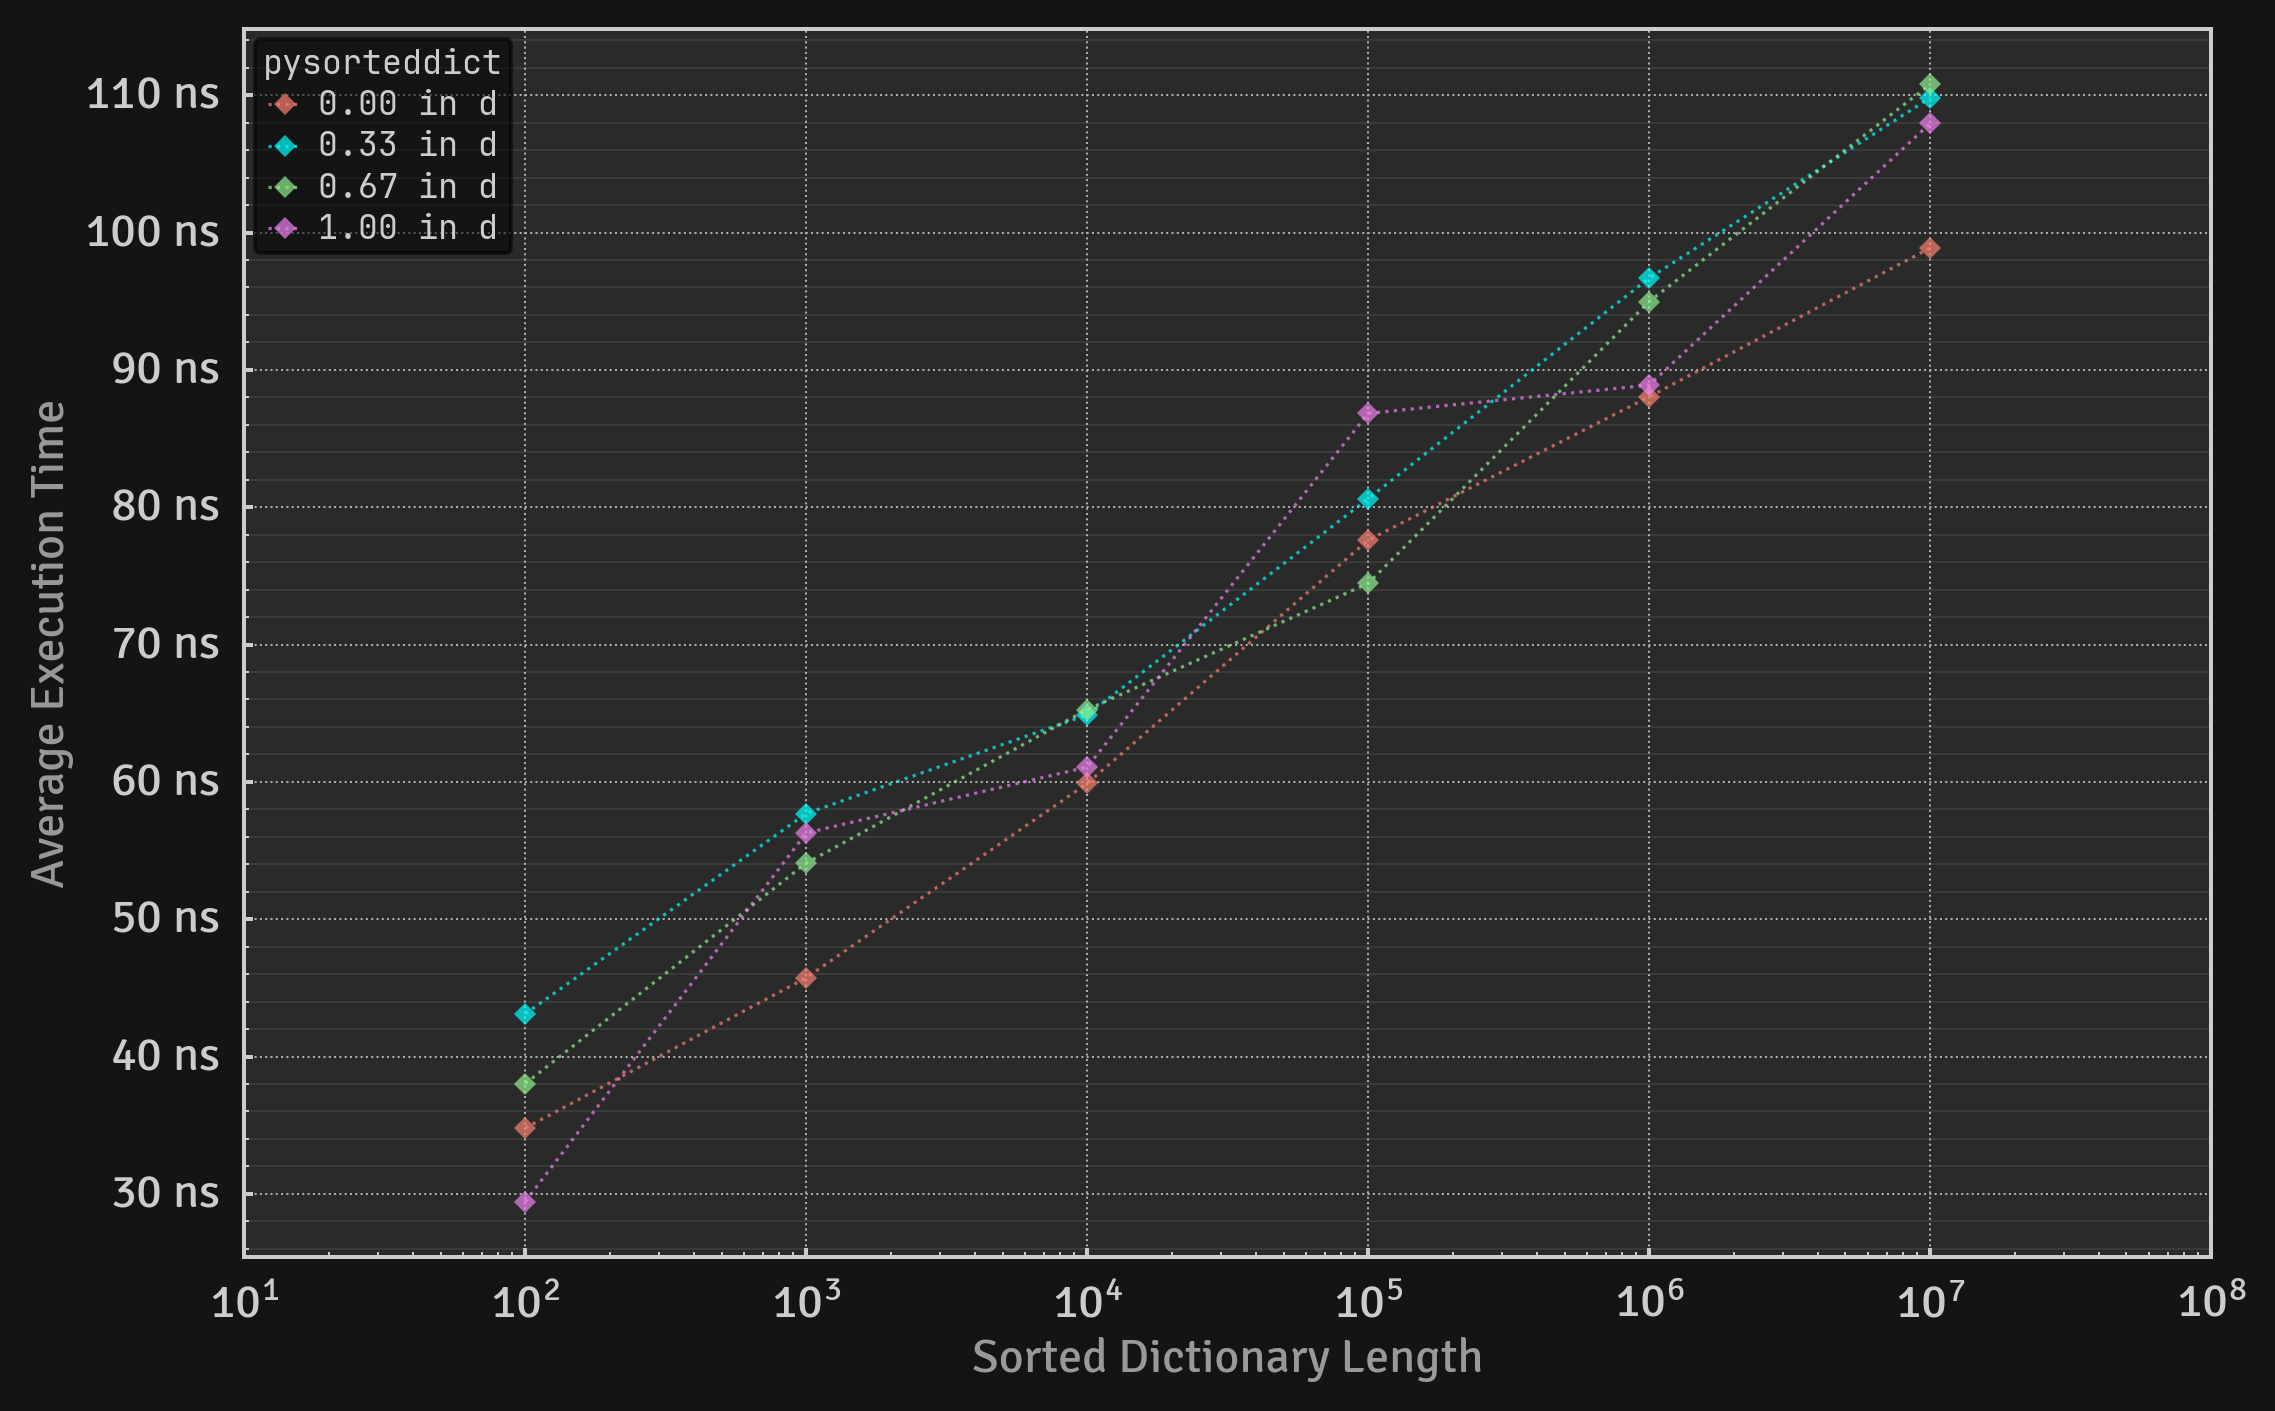

In [3]:
for styler in stylers:
    display(styler)
plot(stylers, name="contains", yunit="ns")

# `setitem`

In [4]:
def set_del(d: MutableMapping, keys: list[float]):
    for key in keys:
        d[key] = None
    for key in keys:
        del d[key]


def bench_setitem() -> Iterable[Styler]:
    keys_lens = [33, 67, 100]
    for sorted_dict_type in sorted_dict_types:
        df = pd.DataFrame(index=sorted_dict_lens, columns=[f"set_del(d, keys_{keys_len})" for keys_len in keys_lens])
        for i, sorted_dict_len in enumerate(sorted_dict_lens):
            for j, keys_len in enumerate(keys_lens):
                d = setup(sorted_dict_type, sorted_dict_len)
                keys = [random.random() for _ in range(keys_len)]
                %timeit -v bench set_del(d, keys)
                df.iat[i, j] = bench.average * 1e6
        yield df.style.set_caption(sorted_dict_type.__module__)


stylers = [*bench_setitem()]

3.92 μs ± 5.48 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


8.17 μs ± 8.03 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


12.4 μs ± 15.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


4.88 μs ± 6.37 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


9.97 μs ± 27.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


15.4 μs ± 29 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


5.82 μs ± 7.97 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


12.2 μs ± 59.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


21.1 μs ± 65.2 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


6.79 μs ± 6.44 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


15.4 μs ± 50.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


27.8 μs ± 131 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


7.76 μs ± 18.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


20.2 μs ± 150 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


38 μs ± 149 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


9.09 μs ± 17.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


29 μs ± 90 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


58.2 μs ± 100 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


,"set_del(d, keys_33)","set_del(d, keys_67)","set_del(d, keys_100)"
100,3.920490,8.172428,12.433753
1000,4.881001,9.968431,15.369440
10000,5.815947,12.248063,21.100984
100000,6.794364,15.359669,27.843351
1000000,7.761970,20.209861,38.023455
10000000,9.088524,28.995454,58.195342


/tmp/ipykernel_2105/3893703347.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(f"{label.get_text()} {yunit}" for label in ax.get_yticklabels())


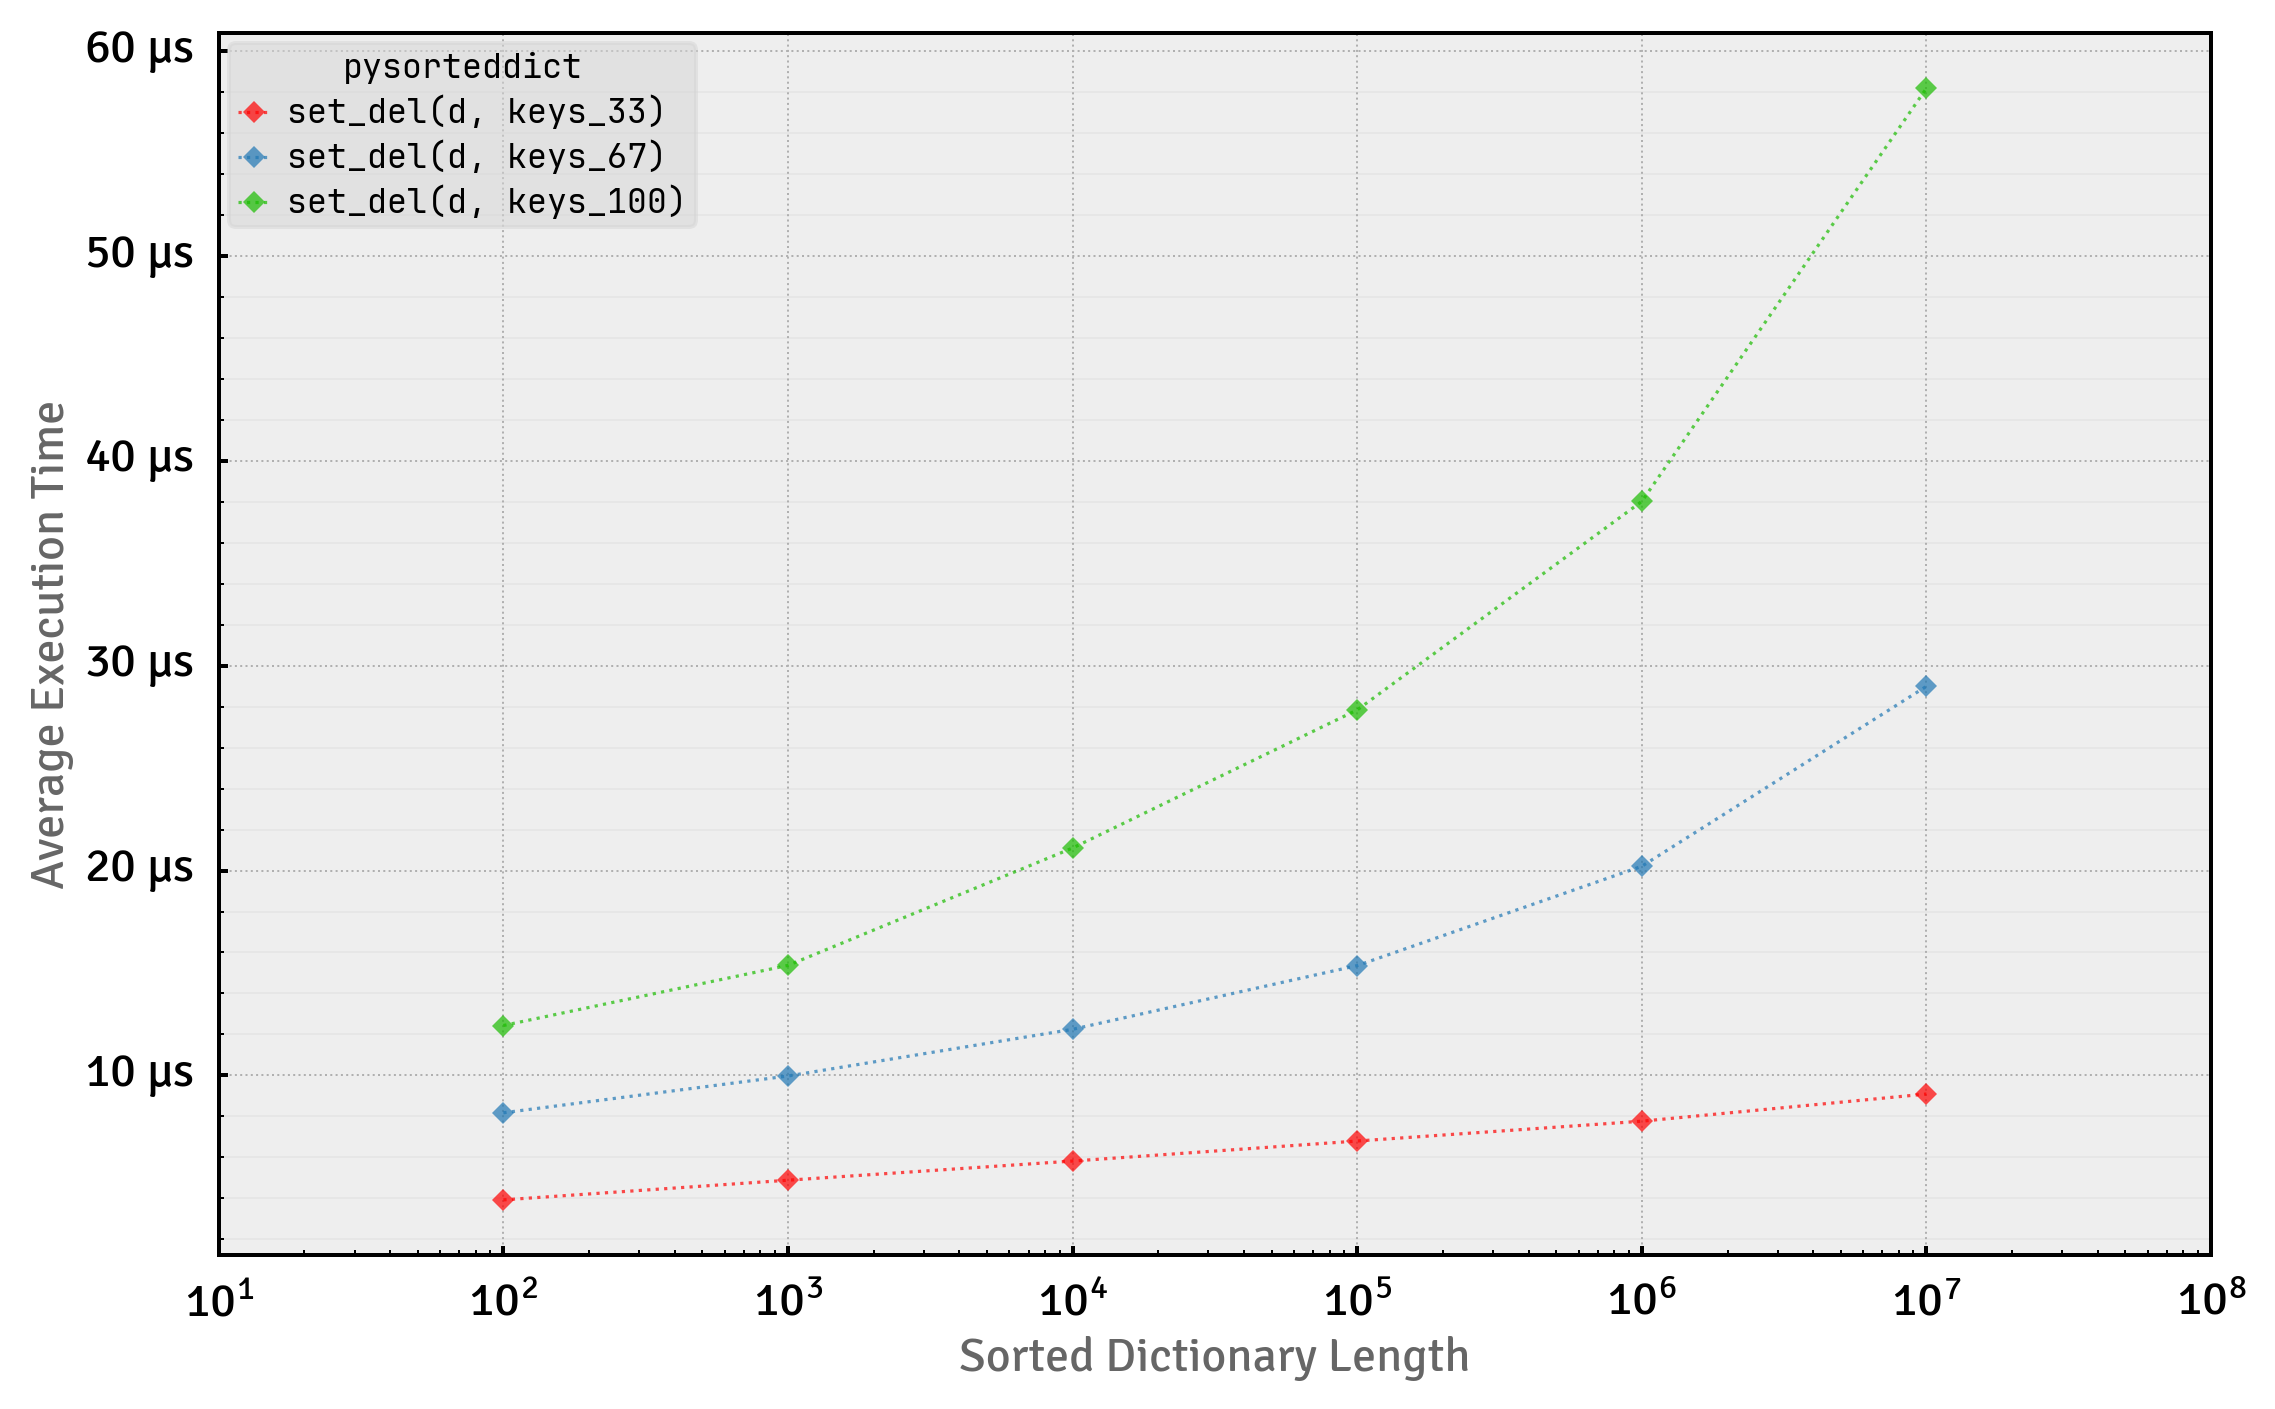

/tmp/ipykernel_2105/3893703347.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(f"{label.get_text()} {yunit}" for label in ax.get_yticklabels())


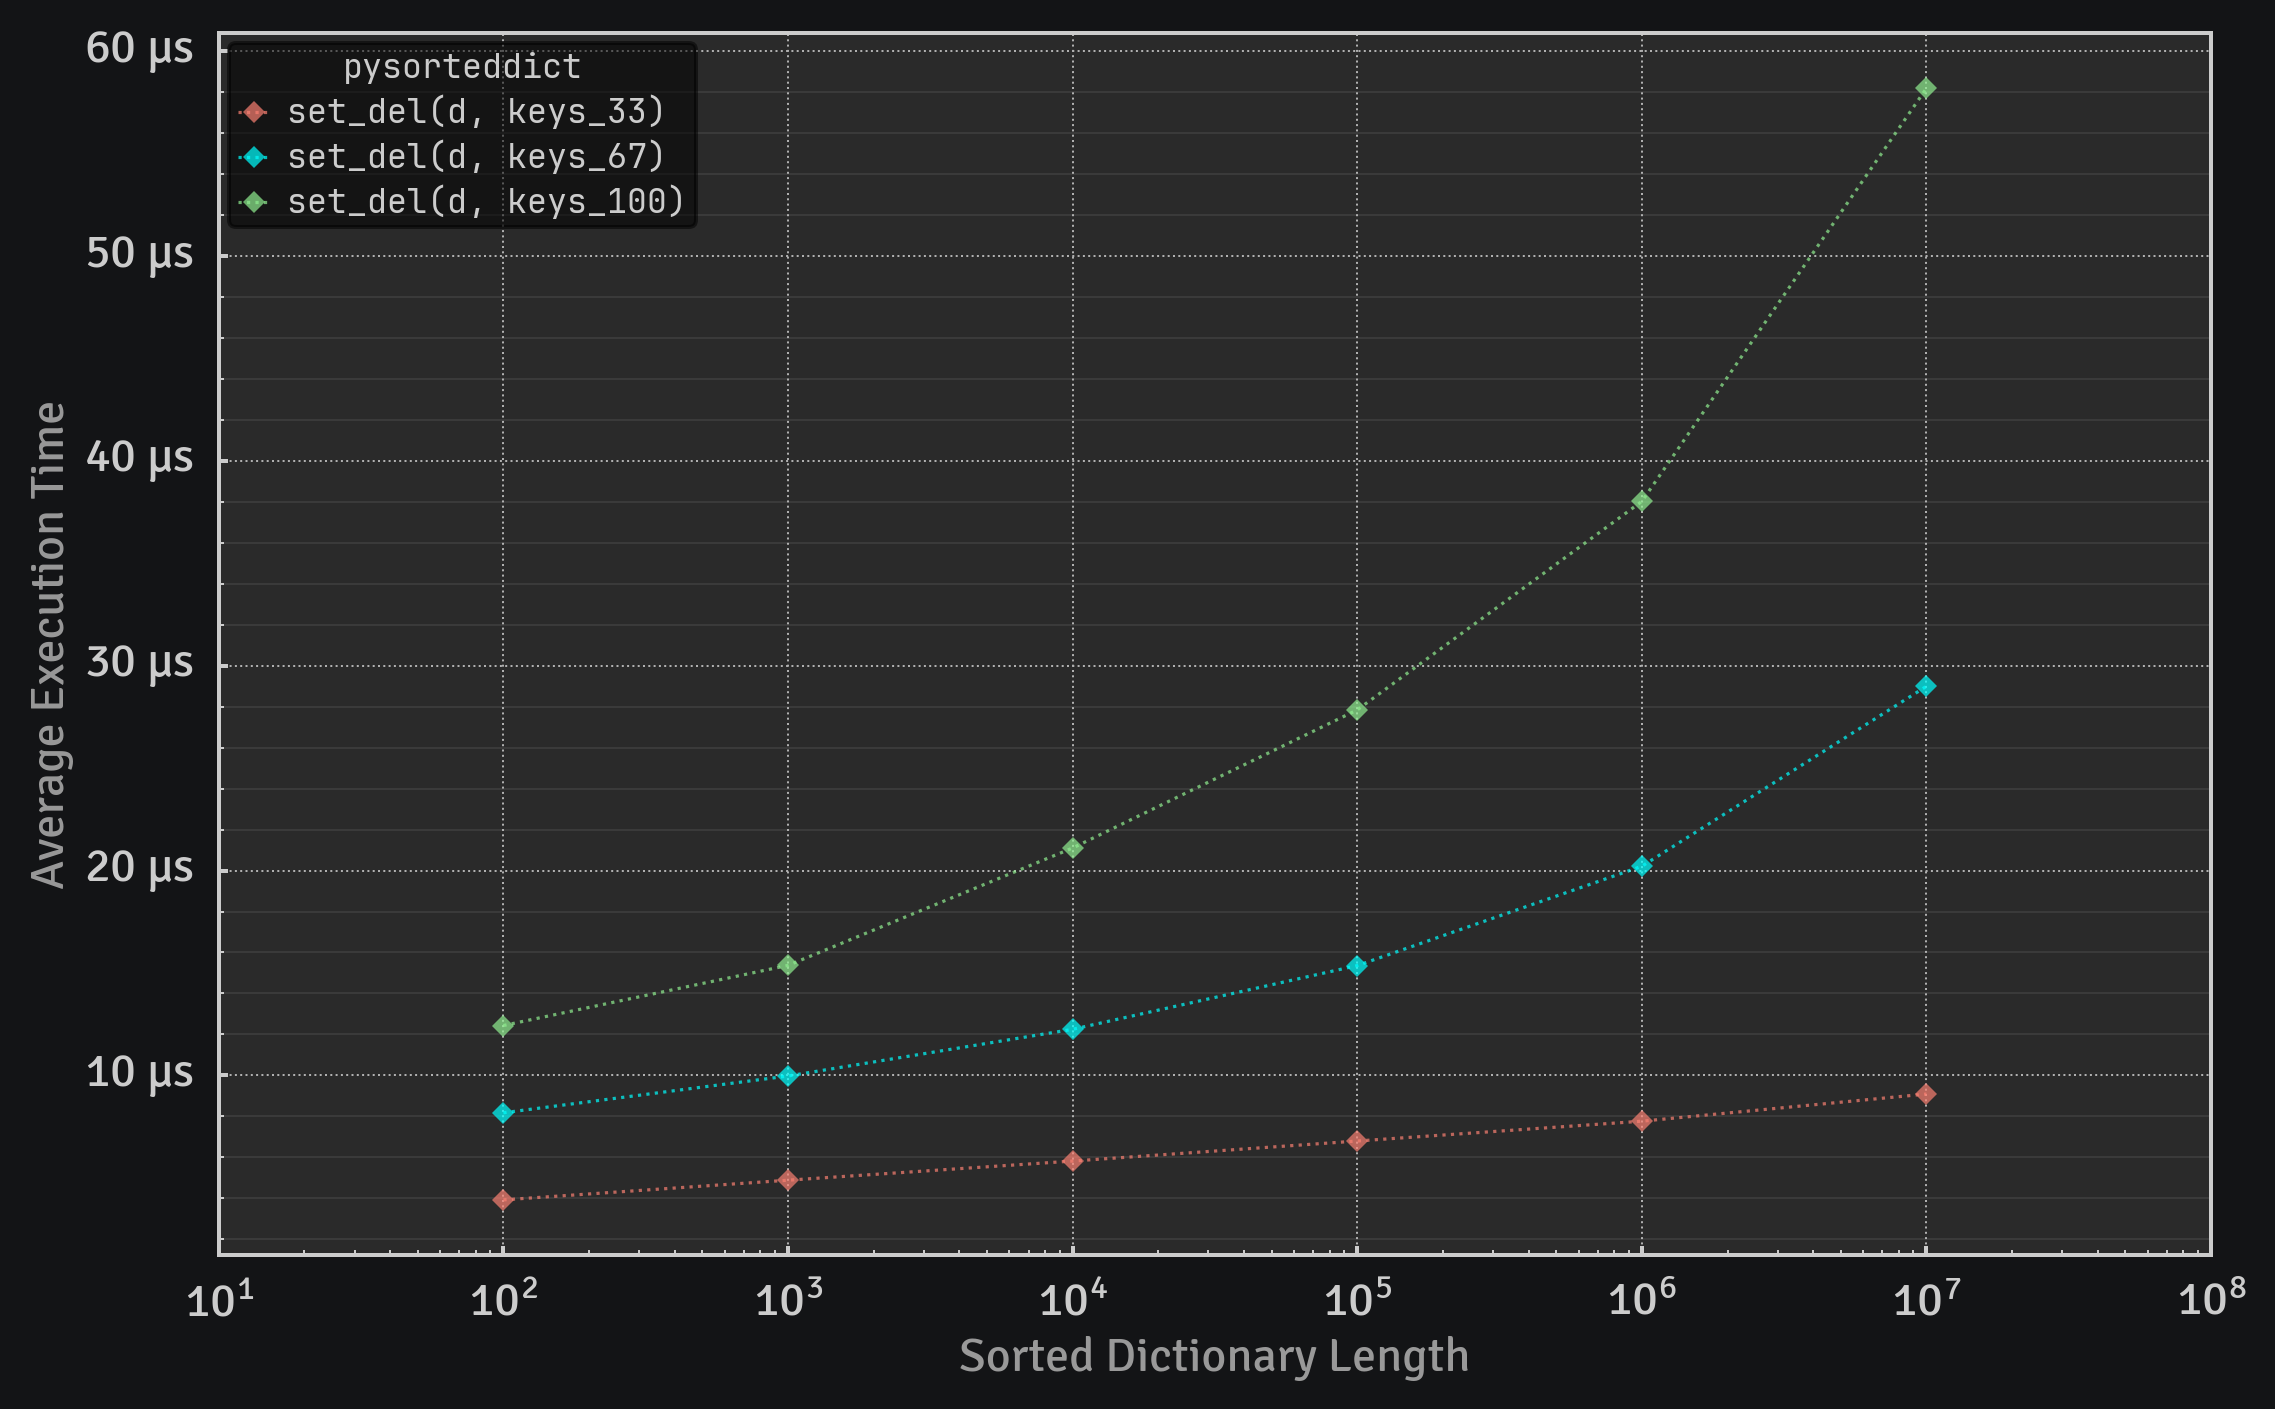

In [5]:
for styler in stylers:
    display(styler)
plot(stylers, name="setitem", yunit="μs")

# `iter`

In [6]:
def bench_iter() -> Iterable[Styler]:
    for sorted_dict_type in sorted_dict_types:
        df = pd.DataFrame(index=sorted_dict_lens, columns=["for _ in d: pass", "for _ in reversed(d): pass"])
        for i, sorted_dict_len in enumerate(sorted_dict_lens):
            d = setup(sorted_dict_type, sorted_dict_len)
            %timeit -v bench for _ in d: pass
            df.iat[i, 0] = bench.average
            %timeit -v bench for _ in reversed(d): pass
            df.iat[i, 1] = bench.average
        yield df.style.set_caption(sorted_dict_type.__module__)


stylers = [*bench_iter()]

602 ns ± 0.813 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


879 ns ± 1.02 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


5.94 μs ± 10.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


8.64 μs ± 17.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


98.3 μs ± 246 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


124 μs ± 122 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


2.07 ms ± 1.69 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


2.31 ms ± 5.33 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


104 ms ± 136 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


108 ms ± 205 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


1.2 s ± 1.55 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


1.24 s ± 7.81 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


,for _ in d: pass,for _ in reversed(d): pass
100,0.000001,0.000001
1000,0.000006,0.000009
10000,0.000098,0.000124
100000,0.002065,0.002314
1000000,0.104420,0.108018
10000000,1.201738,1.244778


/tmp/ipykernel_2105/3893703347.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(f"{label.get_text()} {yunit}" for label in ax.get_yticklabels())


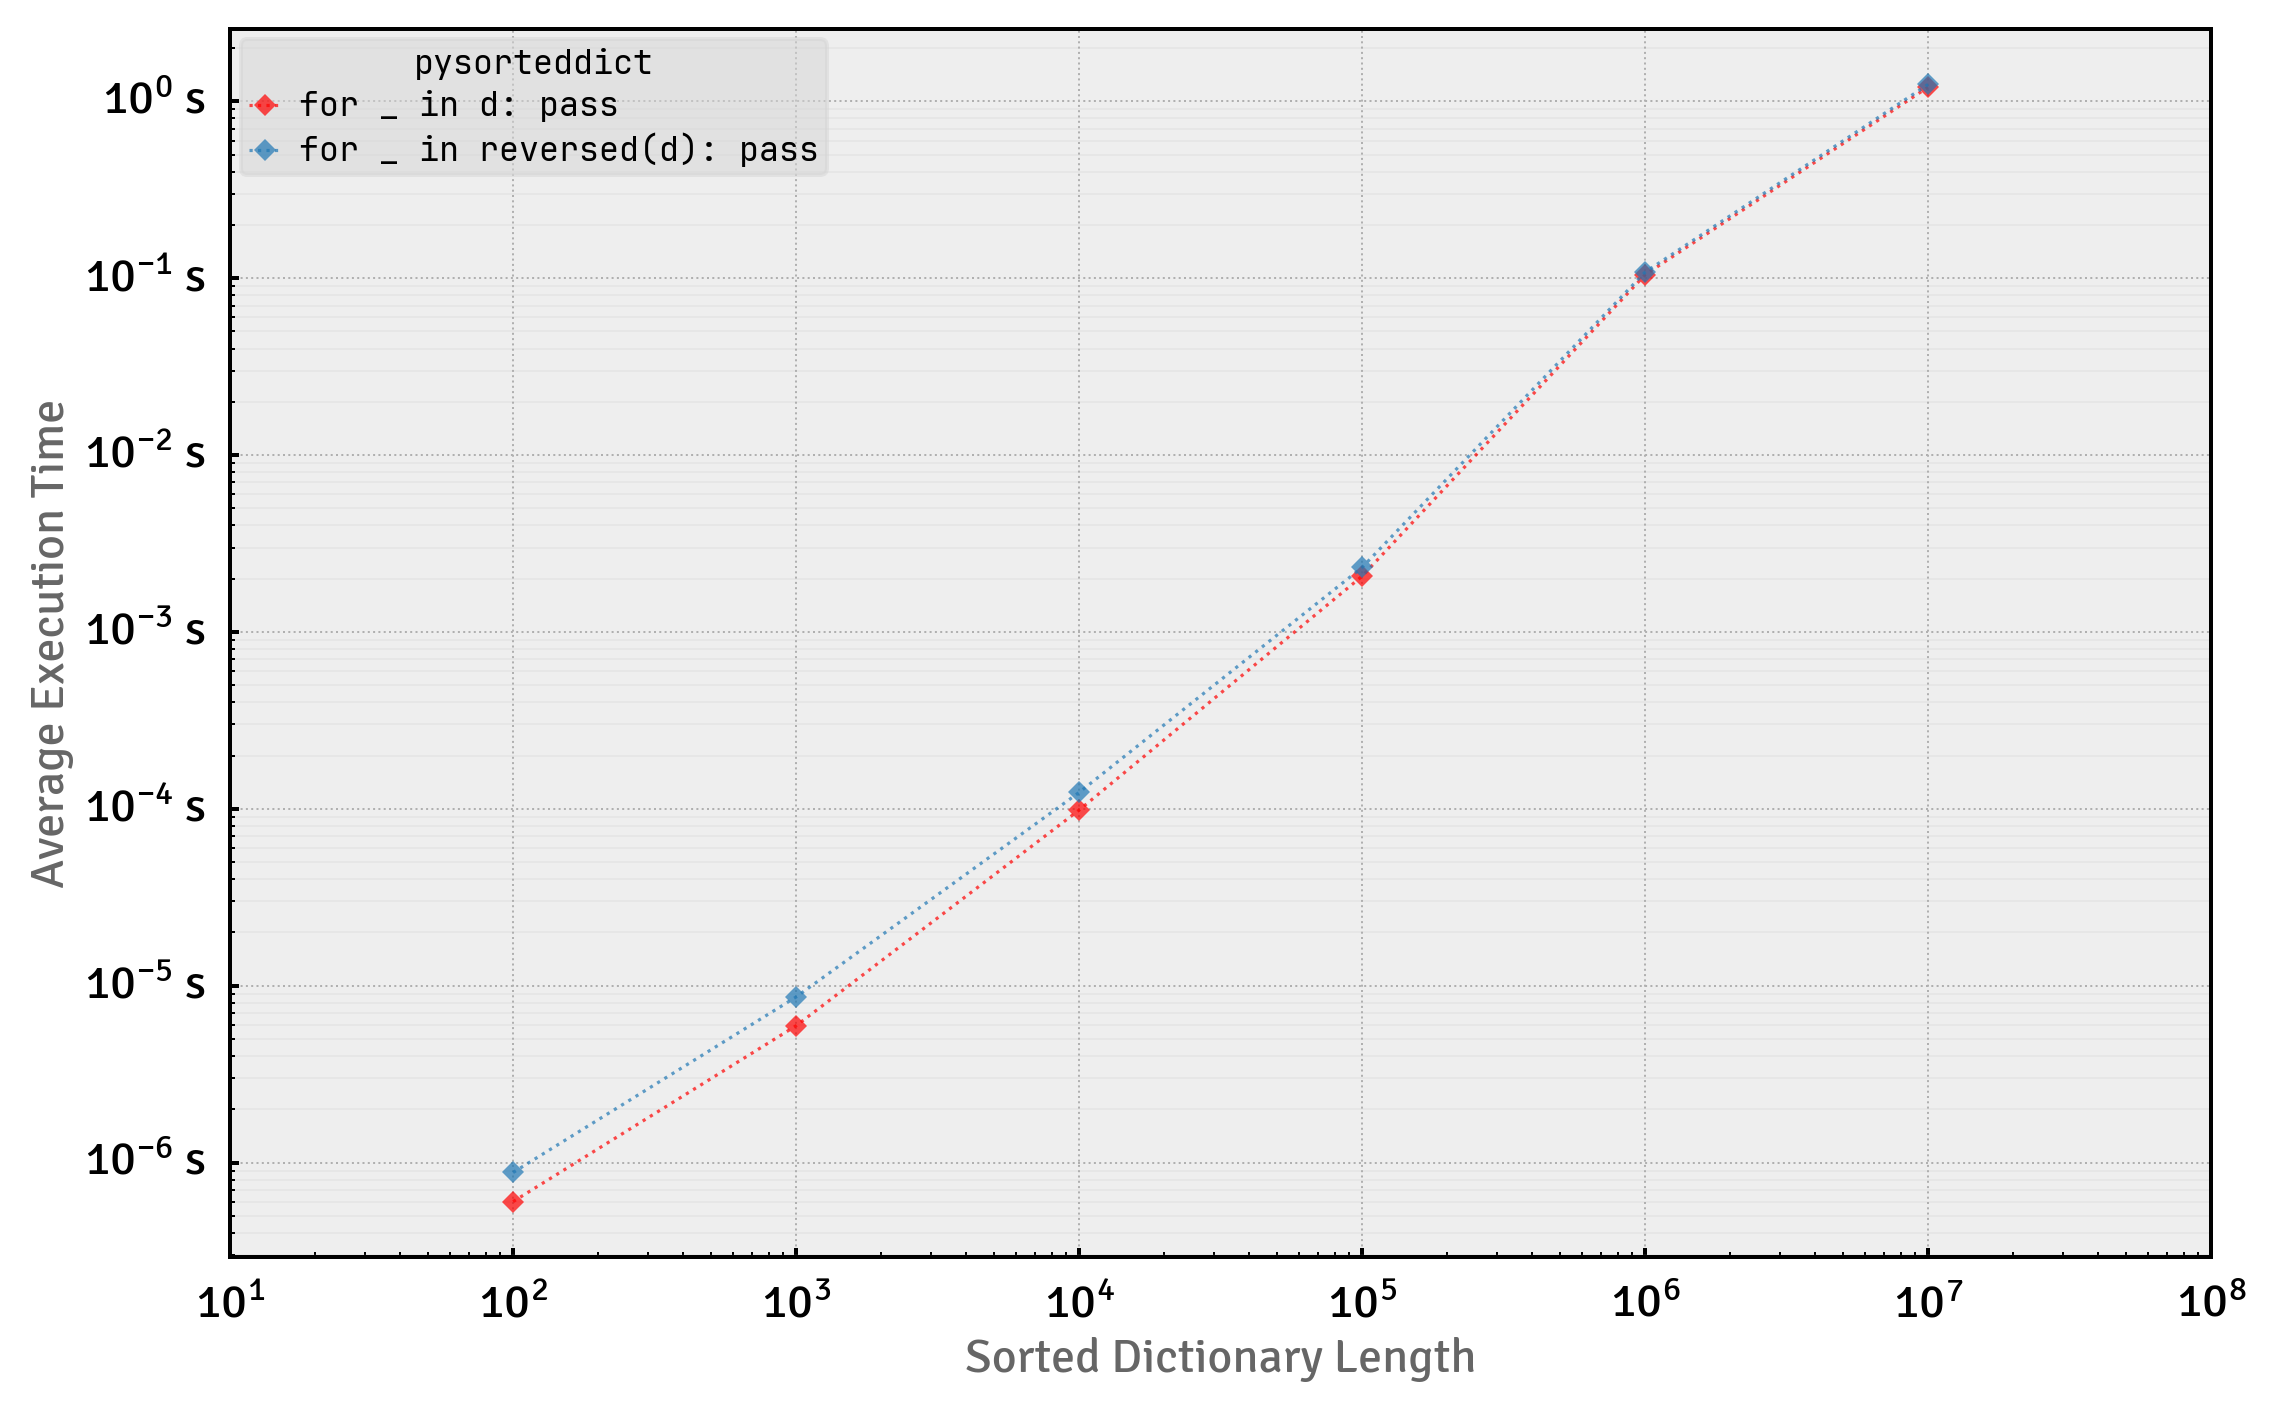

/tmp/ipykernel_2105/3893703347.py:55: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(f"{label.get_text()} {yunit}" for label in ax.get_yticklabels())


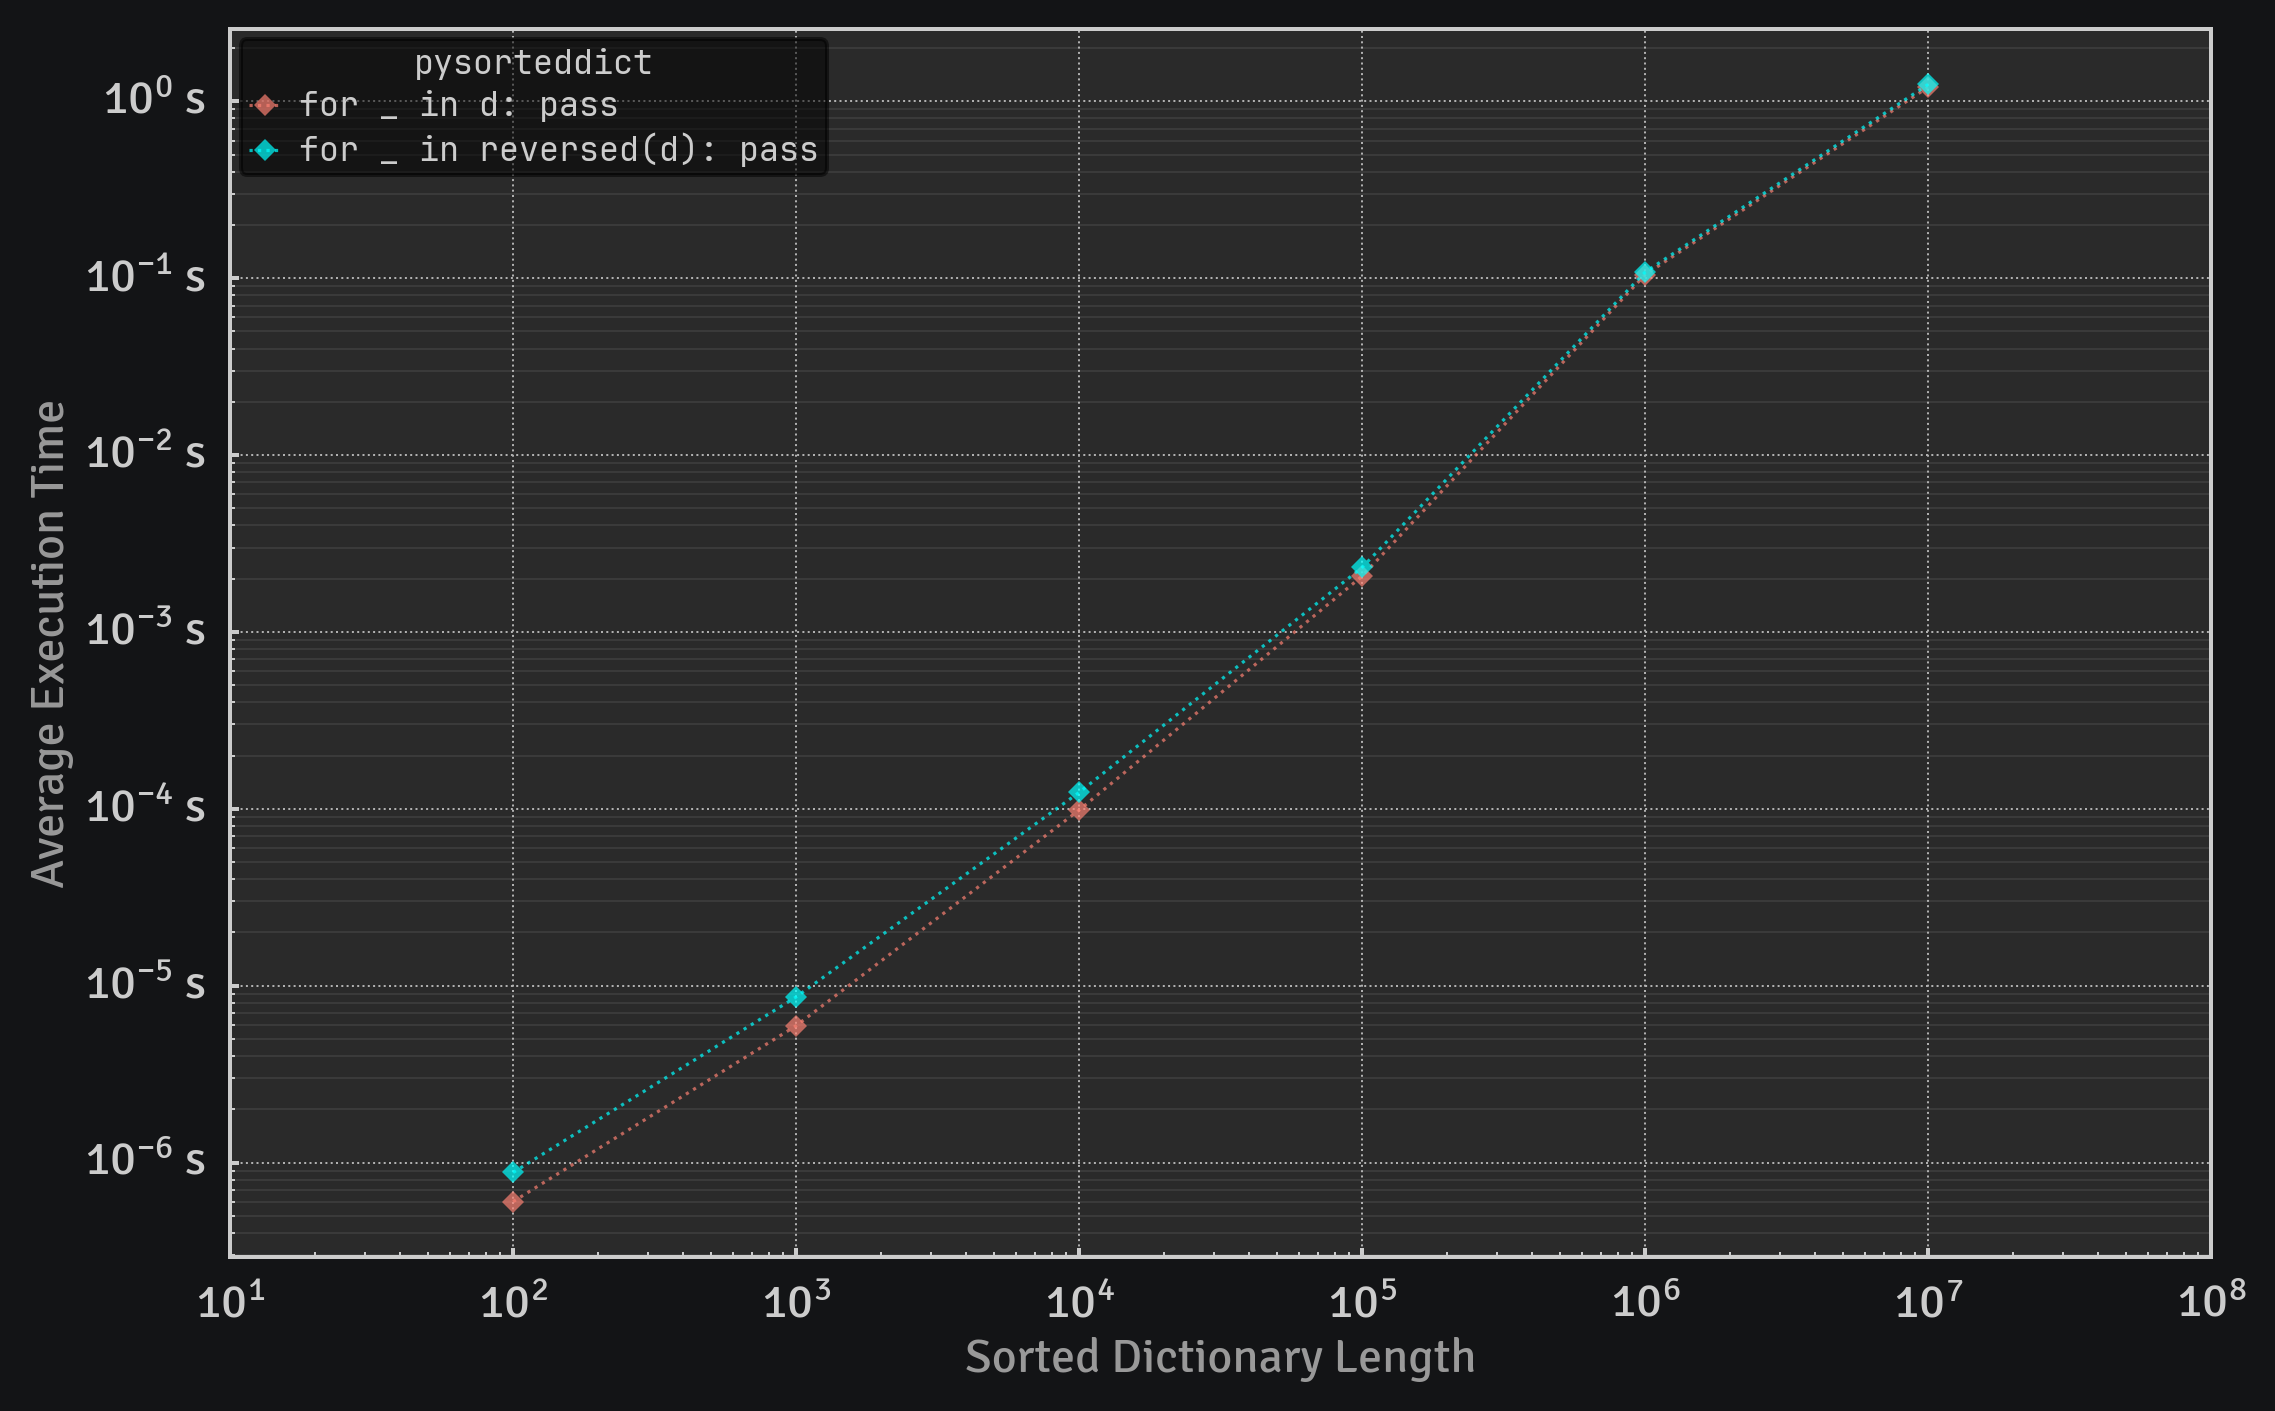

In [7]:
for styler in stylers:
    display(styler)
plot(stylers, logy=True, name="iter")